# The Evolution of the NBA and the Meteoric Rise of the 3 point shot
In this project I will be exploring how the game of basketball played in the NBA has changed over the last 20 seasons. Specifically, I will be comparing 3 different periods of time to show the
insane growth of eFG% (effective field goal % measures how well a player shoots taking into consideration 3 pointers).

The goal of this end-to-end project was to demonstrate my ability to:
>1. Collect Data
>       - This was done through python using the unofficial nba_api
>       - Retrieved data on every player across 3 time periods within a 20 year range (2002, 2012, 2022)
>2. Store Data
>       - For this project, I stored my data in csv files. 
>       - a SQL database would've been a better option if I wanted to scale the project in the future (i.e., data on all NBA seasons)
>3. Load Data
>       - Data was loaded into python through the pandas library which handles csv files very easily
>4. Manipulate Data
>       - Utilize the pandas library to process and clean the data
>       - This step included merging dataframes together since our desired info was spread across 2 sets of data
>       - Adding columns to help with our analysis (eFG%, 3pt_ratio)
>       - Dropping rows that represented subtotals instead of aggregated totals for certain players that were on multiple teams through-out a season
>       - Re-mapping column data
>       - Formatting columns
>5. Analyze Data for Insights
>       - Utilize matplotlib and seaborn libraries to create attractive visuals that tell a story
>       - Create scatter plots to show the relationship between eFG% and 3pt_ratio across the span of 20 years
>       - Summary statistics to show change between 2002 to 2022

## Collecting & Storing Data
I'm using the unofficial nba_api (https://github.com/swar/nba_api) to gather player stats (points, rebounds, shooting %s) and general info (positional data, first + last name) for every player that played in the 2002, 2012, 2022 seasons. This data will be the basis of my analysis. I'll also be retrieving individual shot chart data to help visualize how the game has changed on the court level.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from pandas import DataFrame
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
import time
from os import path

DATA_DIR = 'C:/Users/Jordan Chen/code_basketball/basketball_files/data'

In [5]:
## Retrieve only active players to use for our 2022 data set. Helps speed up the process so I dont have to iterate through 
## every id of every player in history
nba_players = players.get_active_players()
players_df = pd.DataFrame(nba_players)
active_player_ids = players_df['id'].to_list()

## Retrieve all players to have played in the NBA. This list will be used for our 2002 and 2012 data sets.
all_players = players.get_players()
all_players_df = pd.DataFrame(all_players)
all_players = all_players_df['id'].to_list()
all_players_df[all_players_df['full_name'] == 'Goran Dragic'] ## example of finding player info by full name

,id,full_name,first_name,last_name,is_active
1133,201609,Goran Dragic,Goran,Dragic,False


In [188]:
## Using the above list works for getting the 2002 and 2012 data but is painfully slow since we are requesting from 
## an API. Instead of looping through the list of every single nba player in history, to speed up the process I created
## a csv with a list of both the 2002 and 2012 players found online
## This csv will be the source for our player lists that we will loop through to get our 2002 and 2012 data from
df_names_2002_and_2012 = pd.read_csv(path.join(DATA_DIR, '2002_2012_player_list.csv' ))
df_names_2002_and_2012.head()

,2002,2012
0,Tariq Abdul-Wahad,Quincy Acy
1,Shareef Abdur-Rahim,Jeff Adrien
2,Courtney Alexander,Arron Afflalo
3,Malik Allen,Josh Akognon
4,Ray Allen,Cole Aldrich


In [185]:
# seperate the 2002 players 
df_names_2002 = df_names_2002_and_2012['2002']
df_names_2002.dropna(inplace=True)
names_2002 = df_names_2002.to_list()

In [187]:
# repeat for 2012. 
df_names_2012 = df_names_2002_and_2012['2012']
df_names_2012.dropna(inplace=True)
names_2012 = df_names_2012.to_list()

In [189]:
## Getting list of ids for players that played in the 2002-03 season through the nba api
ids_2002 = []
for name in names_2002:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name}")
    ids_2002.append(append_df)

## In this list I altered the excluded names that were printed out so that they match the ones in the api. This should give us the player ids for the excluded players
leftovers_2002 = ['Predrag Drobnjak',
'Anfernee Hardaway',
'Roger Mason Jr.',
'Mengke Bateer',
"Mamadou N'diaye",
'Nene',
'Clifford Robinson',
'Charles Smith',
'Steven Smith',
'Maurice Taylor',
'Wang Zhi-zhi',
'Clar. Weatherspoon',
'Frank Williams']

## run it once more for excluded players
for name in leftovers_2002:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name}")
    ids_2002.append(append_df)

ids_2002_df = pd.concat(ids_2002, ignore_index=True)
ids_2002_df = ids_2002_df.drop_duplicates(subset= ['id'], keep='first')
ids_2002_list = ids_2002_df['id'].to_list()


Peja Drobnjak
Penny Hardaway
Roger Mason
Bateer Mengke
Mamadou N'Diaye
Maybyner Nene
Cliff Robinson
Charles Cornelius Smith
Steve Smith
Mo Taylor
Zhizhi Wang
Clarence Weatherspoon
Frankie Williams


In [ ]:
## Retrieving 2002 season player data
df_2002 = []
for id in ids_2002_list:
    player_career = playercareerstats.PlayerCareerStats(player_id=id, timeout=60)
    player_df = player_career.get_data_frames()[0]
    df = player_df[player_df['SEASON_ID'] == '2002-03']
    if not df.empty:
        df_2002.append(df)
    time.sleep(0.75)
df_player_stats_2002 = pd.concat(df_2002, ignore_index=True)

In [4]:
## Saving the data to a csv so we have a static copy
df_player_stats_2002.to_csv(path.join(DATA_DIR, '2002_season_player_stats.csv'), index=False)
df_player_stats_2002.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1505,2002-03,0,1610612742,DAL,28.0,14,0,204.0,27,...,0.500,14,26,40,21,6,3,7,26,57
1,949,2002-03,0,1610612737,ATL,26.0,81,81,3087.0,566,...,0.841,175,502,677,242,87,38,212,240,1608
2,2042,2002-03,0,1610612740,NOH,26.0,66,7,1360.0,193,...,0.808,39,79,118,79,31,6,68,125,523
3,2124,2002-03,0,1610612748,MIA,25.0,80,73,2320.0,335,...,0.802,134,291,425,54,37,78,128,234,767
4,951,2002-03,0,1610612749,MIL,27.0,47,46,1683.0,351,...,0.913,45,173,218,164,57,11,117,149,1003


In [ ]:
## Get all the position data for players in the 2002 season
df_pos_2002 = []
for id in ids_2002_list:
    player_pos = commonplayerinfo.CommonPlayerInfo(player_id = id, timeout=60)
    df_player_pos = player_pos.get_data_frames()[0]
    df_pos_2002.append(df_player_pos)
    time.sleep(0.75)
df_player_pos_2002 = pd.concat(df_pos_2002, ignore_index=True)

In [6]:
# save to csv for a static copy of the data
df_player_pos_2002.to_csv(path.join(DATA_DIR, 'player_positions_2002.csv'), index=False)
df_player_pos_2002.head()

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997,2003,N,Y,Y,1997,1,11,N
1,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11T00:00:00,California,USA,...,shareef_abdur-rahim,1996,2007,N,Y,Y,1996,1,3,N
2,2042,Courtney,Alexander,Courtney Alexander,"Alexander, Courtney",C. Alexander,courtney-alexander,1977-04-27T00:00:00,Fresno State,USA,...,courtney_alexander,2000,2003,N,Y,Y,2000,1,13,N
3,2124,Malik,Allen,Malik Allen,"Allen, Malik",M. Allen,malik-allen,1978-06-27T00:00:00,Villanova,USA,...,malik_allen,2001,2010,N,Y,Y,Undrafted,Undrafted,Undrafted,N
4,951,Ray,Allen,Ray Allen,"Allen, Ray",R. Allen,ray-allen,1975-07-20T00:00:00,Connecticut,USA,...,ray_allen,1996,2013,N,Y,Y,1996,1,5,Y


In [163]:
## Getting list of all ids for players that played in the 2012-13 season
ids_2012 = []
for name in names_2012:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name}")
    ids_2012.append(append_df)
ids_2012_df = pd.concat(ids_2012, ignore_index=True)

leftovers_2012 = ['JJ Hickson',
'Perry Jones III',
'Roger Mason Jr.',
'CJ Miles',
'Marcus Morris Sr.',
'AJ Price',
'JJ Redick',
'JR Smith',
'DJ White']

for name in leftovers_2012:
    append_df = all_players_df[all_players_df['full_name'] == name]
    if append_df.empty:
        print(f"{name}")
    ids_2012.append(append_df)

ids_2012_df = pd.concat(ids_2012, ignore_index=True)
ids_2012_df = ids_2012_df.drop_duplicates(subset= ['id'], keep='first')
ids_2012_list = ids_2012_df['id'].to_list()


J.J. Hickson
Perry Jones
Roger Mason
C.J. Miles
Marcus Morris
Maybyner Nene
A.J. Price
J.J. Redick
J.R. Smith
D.J. White


In [ ]:
## Retrieving 2012 season player data
df_2012 = []
for id in ids_2012_list:
    player_career = playercareerstats.PlayerCareerStats(player_id=id, timeout=60)
    player_df = player_career.get_data_frames()[0]
    df = player_df[player_df['SEASON_ID'] == '2012-13']
    if not df.empty:
        df_2012.append(df)
    time.sleep(0.5)
df_player_stats_2012 = pd.concat(df_2012, ignore_index=True)

In [10]:
df_player_stats_2012.to_csv(path.join(DATA_DIR, '2012_season_player_stats.csv'), index=False)
df_player_stats_2012.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203112,2012-13,0,1610612761,TOR,22.0,29,0,342.0,42,...,0.816,30,47,77,11,13,15,17,53,116
1,202399,2012-13,0,1610612766,CHA,27.0,52,5,713.0,72,...,0.650,68,128,196,36,18,27,32,80,209
2,201167,2012-13,0,1610612753,ORL,27.0,64,64,2307.0,397,...,0.857,29,210,239,206,40,11,138,137,1057
3,203006,2012-13,0,1610612742,DAL,27.0,3,0,9.0,2,...,0.000,0,1,1,1,0,0,0,3,5
4,202332,2012-13,0,1610612745,HOU,24.0,30,0,213.0,23,...,0.444,12,45,57,6,3,9,14,41,50


In [ ]:
## Get all the position data for players in the 2012 season
df_pos_2012 = []
for id in ids_2012_list:
    player_pos = commonplayerinfo.CommonPlayerInfo(player_id = id, timeout=60)
    df_player_pos = player_pos.get_data_frames()[0]
    df_pos_2012.append(df_player_pos)
    time.sleep(0.75)
df_player_pos_2012 = pd.concat(df_pos_2012, ignore_index=True)

In [7]:
df_player_pos_2012.to_csv(path.join(DATA_DIR, 'player_positions_2012.csv'), index=False)
df_player_pos_2012.head()

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,203112,Quincy,Acy,Quincy Acy,"Acy, Quincy",Q. Acy,quincy-acy,1990-10-06T00:00:00,Baylor,USA,...,quincy_acy,2012,2018,Y,Y,Y,2012,2,37,N
1,202399,Jeff,Adrien,Jeff Adrien,"Adrien, Jeff",J. Adrien,jeff-adrien,1986-02-10T00:00:00,Connecticut,USA,...,jeff_adrien,2010,2014,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
2,201167,Arron,Afflalo,Arron Afflalo,"Afflalo, Arron",A. Afflalo,arron-afflalo,1985-10-15T00:00:00,UCLA,USA,...,arron_afflalo,2007,2017,N,Y,Y,2007,1,27,N
3,203006,Josh,Akognon,Josh Akognon,"Akognon, Josh",J. Akognon,josh-akognon,1986-02-10T00:00:00,California State-Fullerton,USA,...,josh_akognon,2012,2012,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
4,202332,Cole,Aldrich,Cole Aldrich,"Aldrich, Cole",C. Aldrich,cole-aldrich,1988-10-31T00:00:00,Kansas,USA,...,cole_aldrich,2010,2017,Y,Y,Y,2010,1,11,N


In [ ]:
## retrieving 2022 player data
df_2022 = []
for id in active_player_ids:
    player_career = playercareerstats.PlayerCareerStats(player_id=id, timeout=60)
    player_df = player_career.get_data_frames()[0]
    df = player_df[player_df['SEASON_ID'] == '2022-23']
    df_2022.append(df)
    time.sleep(1)
df_player_stats_2022 = pd.concat(df_2022, ignore_index=True)

In [9]:
df_player_stats_2022.to_csv(path.join(DATA_DIR, '2022_season_player_stats.csv'), index=False)
df_player_stats_2022.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630173,2022-23,0,1610612761,TOR,23.0,55,12,1141.0,196,...,0.702,100,228,328,50,31,30,59,102,508
1,203500,2022-23,0,1610612763,MEM,29.0,42,42,1133.0,157,...,0.364,214,271,485,97,36,46,79,98,361
2,1628389,2022-23,0,1610612748,MIA,25.0,75,75,2598.0,602,...,0.806,184,504,688,240,88,61,187,208,1529
3,1630534,2022-23,0,1610612762,UTA,23.0,59,22,1209.0,165,...,0.812,43,78,121,67,16,15,41,99,467
4,1630583,2022-23,0,1610612763,MEM,22.0,77,20,1682.0,247,...,0.750,85,286,371,97,45,48,60,143,696


In [ ]:
## Get all the position data for players in the 2022 season
df_pos_2022 = []
for id in active_player_ids:
    player_pos = commonplayerinfo.CommonPlayerInfo(player_id = id, timeout=60)
    df_player_pos = player_pos.get_data_frames()[0]
    df_pos_2022.append(df_player_pos)
    time.sleep(0.75)
df_player_pos_2022 = pd.concat(df_pos_2022, ignore_index=True)

In [8]:
df_player_pos_2022.to_csv(path.join(DATA_DIR, 'player_positions_2022.csv'), index=False)
df_player_pos_2022.head()

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,...,precious_achiuwa,2020.0,2023.0,N,Y,Y,2020,1,20,N
1,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,...,steven_adams,2013.0,2023.0,N,Y,Y,2013,1,12,N
2,1628389,Bam,Adebayo,Bam Adebayo,"Adebayo, Bam",B. Adebayo,bam-adebayo,1997-07-18T00:00:00,Kentucky,USA,...,bam_adebayo,2017.0,2023.0,N,Y,Y,2017,1,14,N
3,1630534,Ochai,Agbaji,Ochai Agbaji,"Agbaji, Ochai",O. Agbaji,ochai-agbaji,2000-04-20T00:00:00,Kansas,USA,...,ochai_agbaji,2022.0,2023.0,Y,Y,Y,2022,1,14,N
4,1630583,Santi,Aldama,Santi Aldama,"Aldama, Santi",S. Aldama,santi-aldama,2001-01-10T00:00:00,Loyola-Maryland,Spain,...,santi_aldama,2021.0,2023.0,Y,Y,Y,2021,1,30,N


## Processing and cleaning

Now that we have all the raw data that we need saved in csvs we can start cleaning and preparing it for analysis.

In [4]:
## Loading in the saved csv files for player stats and positions. 
## Merging the position df with player stats df for all 3 seasons
df_stats_2002 = pd.read_csv(path.join(DATA_DIR, '2002_season_player_stats.csv'))
df_pos_2002 = pd.read_csv(path.join(DATA_DIR, 'player_positions_2002.csv'))

df_stats_2012 = pd.read_csv(path.join(DATA_DIR, '2012_season_player_stats.csv'))
df_pos_2012 = pd.read_csv(path.join(DATA_DIR, 'player_positions_2012.csv'))

df_stats_2022 = pd.read_csv(path.join(DATA_DIR, '2022_season_player_stats.csv'))
df_pos_2022 = pd.read_csv(path.join(DATA_DIR, 'player_positions_2022.csv'))

## function that merges the stats and position dataframes together 
## while only keeping 4 relevant columns from the position dataframe
def merge_position_stats(pos_df, stats_df):
    df_pos_season = pos_df[['PERSON_ID','FIRST_NAME', 'LAST_NAME', 'POSITION']]
    return pd.merge(df_pos_season, stats_df, left_on='PERSON_ID', right_on='PLAYER_ID')

df_2002_merged = merge_position_stats(df_pos_2002, df_stats_2002)
df_2012_merged = merge_position_stats(df_pos_2012, df_stats_2012)
df_2022_merged = merge_position_stats(df_pos_2022, df_stats_2022)


In [5]:
## concat all 3 merged dfs into a single df that we will use for analysis
df = pd.concat([df_2002_merged, df_2012_merged, df_2022_merged], ignore_index=True)
df.to_csv(path.join(DATA_DIR, 'Player_stats_2002_2012_2022_season.csv'), index=False)
## no rows were lost
df.shape

(1600, 31)

In [6]:
## lowercase all column headings. this is just my preference as I find it easier to access columns later on.
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['person_id', 'first_name', 'last_name', 'position', 'player_id',
       'season_id', 'league_id', 'team_id', 'team_abbreviation', 'player_age',
       'gp', 'gs', 'min', 'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct',
       'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts'],
      dtype='object')

In [7]:
## drop duplicate column leftover from the merge and redundant column
df.drop(columns=['person_id', 'league_id'], inplace=True)

In [8]:
## Create a dictionary to map out our replacement positions for players with 2 listed positions.
## We take the first one as the primary.
df['position'].value_counts()
replacement_dict = {'Forward-Center': 'Forward',
                    'Forward-Guard': 'Forward',
                    'Guard-Forward': 'Guard',
                    'Center-Forward': 'Center'
                    }
df['position'] = df['position'].replace(replacement_dict)

In [9]:
## Players that were on multiple teams through-out a season have a row of data for each team and an aggregate row,
## we want to drop all duplicates of a (player_id & season_id) occurence except the last occurence which stores 
## the aggregate values as TOT in the team column
df.drop_duplicates(subset=['player_id', 'season_id'], keep='last', inplace=True)
df.shape ## 1600 original rows, 271 rows of non-aggregate rows dropped

(1329, 29)

In [10]:
## Our season_id is in the format of 2002-03, we want to change this to just 2002
df['season_id'] = df['season_id'].str[:4]

In [11]:
## creating columns for effective field goal %, 3 point shooting ratio, and true shooting %
df['efg_pct'] = round((df['fgm'] + (0.5 * df['fg3m'])) / df['fga'], 3)
df['fg3a_ratio'] = round(df['fg3a'] / df['fga'], 3)
df['ts_pct'] = round(df['pts'] / (2 * (df['fga'] + 0.44 * df['fta'])), 3)

In [12]:
df[['gp','fg3a_ratio', 'fg3_pct', 'efg_pct']].mean()

gp            54.930775
fg3a_ratio     0.264497
fg3_pct        0.258996
efg_pct        0.487606
dtype: float64

In [16]:
df_50_min_gp = df[df['gp'] >= 50]
df_50_min_gp.head()

,first_name,last_name,position,player_id,season_id,team_id,team_abbreviation,player_age,gp,gs,...,reb,ast,stl,blk,tov,pf,pts,efg_pct,fg3a_ratio,ts_pct
1,Shareef,Abdur-Rahim,Forward,949,2002,1610612737,ATL,26.0,81,81,...,677,242,87,38,212,240,1608,0.487,0.051,0.566
2,Courtney,Alexander,Guard,2042,2002,1610612740,NOH,26.0,66,7,...,118,79,31,6,68,125,523,0.401,0.113,0.459
3,Malik,Allen,Forward,2124,2002,1610612748,MIA,25.0,80,73,...,425,54,37,78,128,234,767,0.424,0.005,0.455
6,Ray,Allen,Guard,951,2002,0,TOT,27.0,76,75,...,381,334,103,14,198,220,1713,0.512,0.391,0.565
8,John,Amaechi,Forward,680,2002,1610612762,UTA,32.0,50,1,...,77,21,14,7,34,50,99,0.314,0.000,0.351


## Analysis
The graphic below shows the staggering growth of both efficiency (measured through eFG%) and 3 point shooting.
To help you better understand, the average center (centers are known to have very high eFG% due to their shot selection being very close to the basket) in 2002 had an eFG% of approx 48%, in 2002 all 3 positions had a higher average eFG% than that.

the 3 point shooting ratio (fg3a_ratio) has increased from a league-wide average of 15.8% to an astounding 39.7% in 20 years while the average eFG% increased from 44.3% to 54.5% as shown below
and this trend has no signs of slowing down. 

Teams have realized that 3 point shots are more efficient than 2 point shots. Even though the 3 pointer is an objectively harder shot, teams have found that it leads to more points per possession.
Another factor to consider is that players in general have just gotten *better* at shooting -- that is to say players in the modern era are more skilled than ever before. Now a part of this could be that teams advocating for more 3 pointers has resulted in a "natural selection" of sorts where poor shooters are slowly phased out of rosters and the league. However I would argue that we are now in a era where its not uncommon to see 7ft centers shooting the 3 ball in large volumes with decent shooting percentages.



Text(0.5, 1.15, 'Explosive Growth of Efficiency in the NBA')

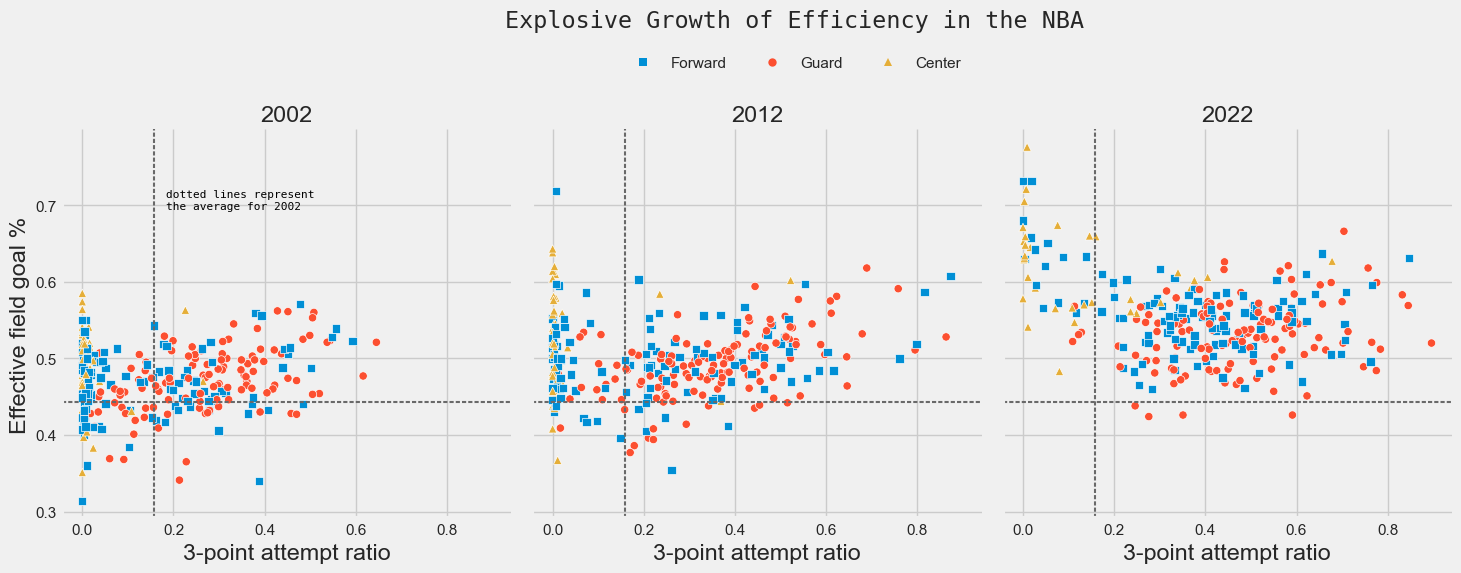

In [519]:
marker_dict = {'Guard': 'o', 'Forward': 's', 'Center': '^'} 
##sns.set_theme(style="ticks") rc=custom_params)
##sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
g = sns.relplot(x='fg3a_ratio', y='efg_pct', col='season_id', hue='position', style='position', markers=marker_dict, data=df_50_min_gp)
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
(g.map(plt.axhline, y= 0.443, color='dimgrey', dashes=(2,1), lw=1.5)
 .map(plt.axvline, x= 0.158, color='dimgrey', dashes=(2,1), lw=1.5)
 .set_axis_labels('3-point attempt ratio', 'Effective field goal %')
 .set_titles("{col_name}").tight_layout())
g.figure.text(0.11, 0.75, 'dotted lines represent\nthe average for 2002', fontsize=8, color='black', fontdict={'family': 'monospace'})
g.figure.suptitle("Explosive Growth of Efficiency in the NBA", y=1.15, fontdict={'family': 'monospace'})

In [487]:
df_50_min_gp.groupby(['position','season_id']).agg({
    'efg_pct': 'mean',
    'fg3a_ratio': 'mean',
    'fg_pct': 'mean',
    'fg3a': 'sum',
    })[['efg_pct', 'fg3a_ratio', 'fg_pct', 'fg3a']]

efg_pct  fg3a_ratio    fg_pct   fg3a
position season_id                                       
Center   2002       0.483149    0.018213  0.480383    467
         2012       0.516558    0.026115  0.511942    565
         2022       0.614970    0.131303  0.592364   2846
Forward  2002       0.467283    0.142417  0.443200  11250
         2012       0.496483    0.225283  0.456725  14915
         2022       0.556670    0.376913  0.490000  25166
Guard    2002       0.471167    0.272719  0.423263  21021
         2012       0.492173    0.358016  0.426992  28326
         2022       0.533254    0.472425  0.446358  42320

In [494]:
# fg3a_ratio has gone from 15.8% to 39.7%, an increase of 23.9% from 2002 to 2022
df.groupby('season_id').agg({
    'fg3a_ratio': 'mean',
    'efg_pct': 'mean',
    'fg3_pct': 'mean'
})

,fg3a_ratio,efg_pct,fg3_pct
season_id,,,
2002,0.158450,0.443375,0.211593
2012,0.237798,0.473892,0.241555
2022,0.397440,0.545818,0.324512


In [499]:
## Only 6/30 teams took less than 1/3 of their TOTAL shots from the 3 point line in 2022. The 6 were still around 28-30%
df_2022_season = df[df['season_id'] == '2022']
df_2022_season = df_2022_season.groupby('team_abbreviation').agg({
                                        'fg3a_ratio': 'mean',
                                        'efg_pct': 'mean',
                                        'fg3_pct': 'mean'
                                        })
df_2022_season.sort_values(by=['fg3a_ratio'], ascending=False)

,fg3a_ratio,efg_pct,fg3_pct
team_abbreviation,,,
MIL,0.529400,0.547800,0.341333
GSW,0.487077,0.561846,0.354538
DAL,0.477364,0.580000,0.334636
LAL,0.465375,0.540875,0.355625
BOS,0.458000,0.582750,0.332167
TOT,0.457929,0.548446,0.337946
OKC,0.438267,0.535133,0.346600
ORL,0.426143,0.526357,0.340071
MEM,0.417813,0.532125,0.289062


In [557]:
## Brook Lopez AKA "Splash Mountain" is a Center known for his impressive shooting ability. But he wasnt always known for this.
## in the 2016-17 season you can see his FG3A explode to 387 attempts. Thats approx 12 times the total of his first 8 seasons attempts combined.
lopez_df = playercareerstats.PlayerCareerStats(player_id=201572)
lopez_df = lopez_df.get_data_frames()[0]
lopez_df['fg3a_ratio'] = lopez_df['FG3A']/ lopez_df['FGA']
lopez_df['SEASON_ID'] = lopez_df['SEASON_ID'].str[:4]
lopez_df[['SEASON_ID','FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'fg3a_ratio']].head()

,SEASON_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,fg3a_ratio
0,2008,448,844,0.531,0,2,0.0,0.002370
1,2009,563,1129,0.499,0,2,0.0,0.001771
2,2010,644,1309,0.492,0,1,0.0,0.000764
3,2011,38,77,0.494,0,0,0.0,0.000000
4,2012,570,1094,0.521,0,1,0.0,0.000914


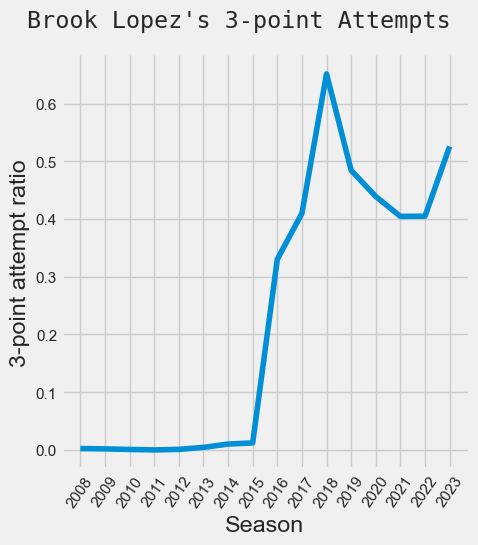

In [556]:
g = sns.relplot(x='SEASON_ID', y='fg3a_ratio', kind='line', data=lopez_df)
plt.style.use('fivethirtyeight')
(g.set_axis_labels('Season', '3-point attempt ratio')
.tick_params(axis='x', rotation=55))
g.figure.suptitle("Brook Lopez's 3-point Attempts", y=1.05, fontdict={'family': 'monospace'})
g.figure.align_labels()
